# Import Library

In [1]:
# mengimport library
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
cmap = plt.get_cmap('Spectral') #mengimpor warna gradasi

# Data Crime in London 2008-2016

In [2]:
# membaca data yang akan digunakan
df_london_crime = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
# mengetahui banyaknya data yang diperoleh
df_london_crime.shape

(13490604, 7)

In [4]:
#mengidentifikasi informasi yang diperlukan
(df_london_crime.head())

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
df_london_crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [6]:
df_london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
#Diketahui diawal bahwa ukuran data crime sebesar (13490604, 7)
#Beberapa memiliki nilai yang unik
# Data yang unik mempermudah untuk analisa data
# Banyaknya unik value pada kolom sebagai berikut:
df_london_crime.describe(include = 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180


In [8]:
df_london_crime.describe(exclude = 'O').transpose()

,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0


In [9]:
#Untuk mengetahui apakah ada data yang kosong
df_london_crime.isnull().any()


lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

# Total crime in London per years

In [10]:
#mengekstrak data untuk total kejahatan per tahun
year = df_london_crime['year'].unique()
sum_year = df_london_crime.groupby('year').sum()
sums=sum_year['value'].to_numpy()

n = len(year)
for i in range(n):
    for j in range (0, n-i-1):
        if year[j]>year[j+1]:
            year[j], year[j+1] = year[j+1], year[j]
            sums[j], sums[j+1] = sums[j+1], sums[j]

print(year)
print(sums)

[2008 2009 2010 2011 2012 2013 2014 2015 2016]
[715324 736121 737329 711624 724915 686407 680183 717214 738641]


In [11]:
df_london_crime_year=pd.DataFrame({
    "Year": year,
    "Total Crime": sums
})
df_london_crime_year.set_index('Year', inplace=True)
df_london_crime_year

,Total Crime
Year,
2008,715324
2009,736121
2010,737329
2011,711624
2012,724915
2013,686407
2014,680183
2015,717214
2016,738641


In [12]:
df_london_crime_year.min()

Total Crime    680183
dtype: int64

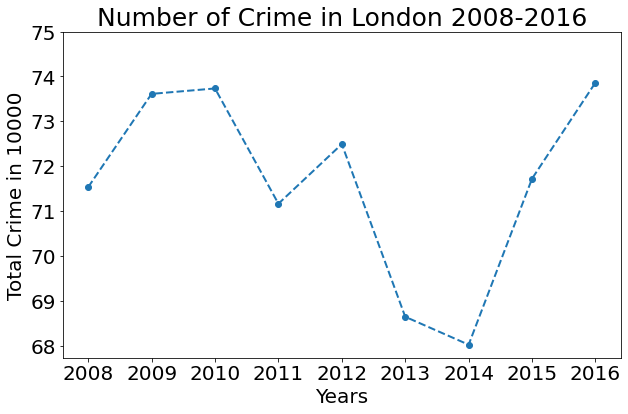

In [13]:
#plotting
df_london_crime_year.plot(marker='o', ls='dashed', lw=2,legend=None, figsize=(10,6))
#modifikasi plot
plt.xlabel('Years', size=20)
plt.ylabel('Total Crime in 10000', size=20)
plt.title('Number of Crime in London 2008-2016', size=25)
plt.xticks(size=20)
#modifikasi sumbu y
values=np.arange(68, 76 , 1)
values_incerment=10000
plt.yticks(values*values_incerment,['%d' %val for val in values], size=20)
plt.show()

# Crime per major category

In [14]:
#mengekstrak data yang dibutuhkan yaitu major_category dan jumlah totalnya
df_crime_major_category=pd.DataFrame(df_london_crime.groupby(['major_category']).size())
df_crime_major_category.rename(columns={0:"Total"}, inplace=True) #mengubah nama kolom
df_crime_major_category

,Total
major_category,
Burglary,1043604
Criminal Damage,2069172
Drugs,1179468
Fraud or Forgery,236520
Other Notifiable Offences,776304
Robbery,939384
Sexual Offences,108108
Theft and Handling,3966300
Violence Against the Person,3171744


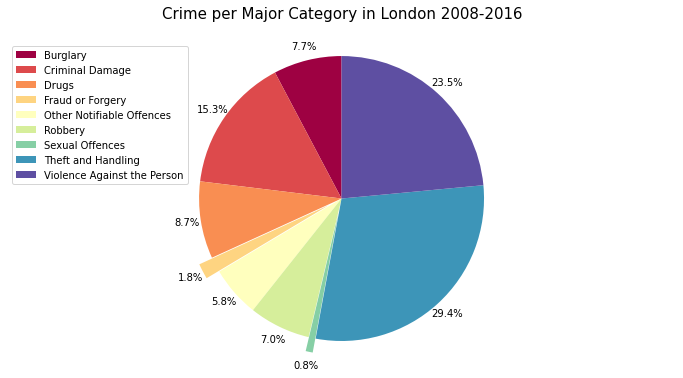

In [15]:
colors = [cmap(i) for i in np.linspace(0, 1, 9)] #mendata warna yang akan digunakan
explode_list=[0,0,0,0.1,0,0,0.1,0,0] #mendata pie yang akan diperbesar supaya mudah dibaca
df_crime_major_category['Total'].plot(kind='pie', figsize=(12,6), autopct='%1.1f%%', startangle=90, colors=colors,labels=None, pctdistance=1.1, explode=explode_list)
plt.title('Crime per Major Category in London 2008-2016', y=1.05, size=15)
plt.axis('equal')
plt.legend(labels=df_crime_major_category.index, loc='upper left')
plt.ylabel(None)#menghilangkan y label
plt.show()

# Histogram of crime per minor category

In [16]:
df_crime_minor_category=pd.DataFrame(df_london_crime.groupby(['minor_category']).size())
df_crime_minor_category.rename(columns={0:"Total"}, inplace=True) #mengubah nama kolom
df_crime_minor_category

,Total
minor_category,
Assault with Injury,521856
Burglary in Other Buildings,522072
Burglary in a Dwelling,521532
Business Property,418716
Common Assault,522180
Counted per Victim,137916
Criminal Damage To Dwelling,521424
Criminal Damage To Motor Vehicle,521964
Criminal Damage To Other Building,503928


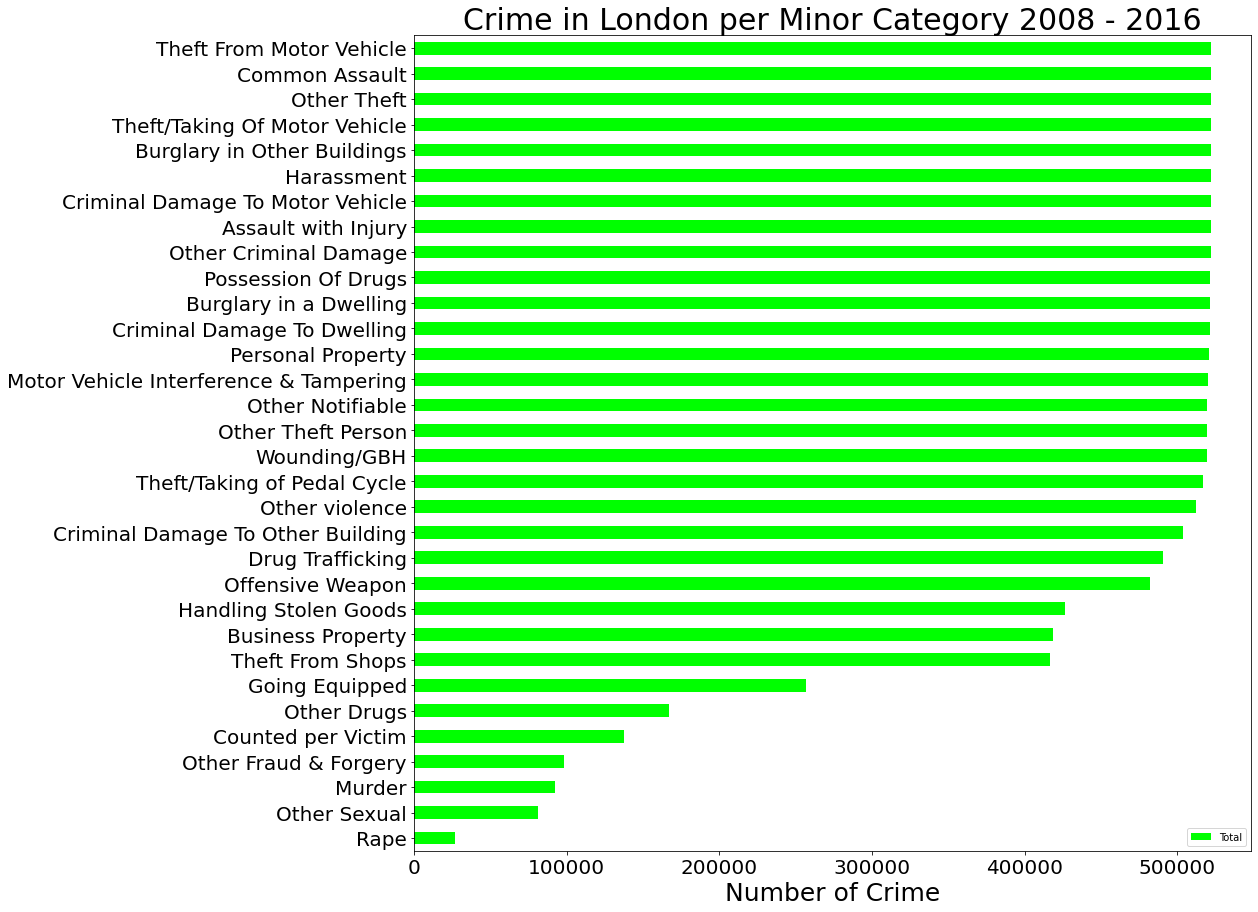

In [17]:
df_crime_minor_category.sort_values(by='Total', ascending=True, inplace=True)
df_crime_minor_category.plot(kind='barh',figsize=(15,15), color='Lime')
plt.xlabel('Number of Crime', size=25)
plt.title('Crime in London per Minor Category 2008 - 2016', size=30)
plt.ylabel(None)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Crime per month

In [18]:
#mengekstrak data yang dibutuhkan
year2008=df_london_crime.loc[df_london_crime['year']==2008]
months2008=year2008['month'].unique()
months2008.sort()
sum_month2008=year2008.groupby(['month']).sum()
months2008_val=sum_month2008['value'].to_numpy()
months2008_val

array([65419, 62626, 61343, 59640, 62587, 62290, 64126, 59959, 58414,
       63354, 61395, 57488])

In [19]:
year2009=df_london_crime.loc[df_london_crime['year']==2009]
months2009=year2009['month'].unique()
months2009.sort()
sum_month2009=year2009.groupby(['month']).sum()
months2009_val=sum_month2009['value'].to_numpy()
months2009_val

array([59142, 54706, 63482, 59181, 62897, 63116, 63281, 58695, 57847,
       61176, 59456, 54235])

In [20]:
year2010=df_london_crime.loc[df_london_crime['year']==2010]
months2010=year2010['month'].unique()
months2010.sort()
sum_month2010=year2010.groupby(['month']).sum()
months2010_val=sum_month2010['value'].to_numpy()
months2010_val

array([54934, 55069, 63629, 60085, 62126, 62632, 63764, 59040, 59731,
       62113, 60665, 51536])

In [21]:
year2011=df_london_crime.loc[df_london_crime['year']==2011]
months2011=year2011['month'].unique()
months2011.sort()
sum_month2011=year2011.groupby(['month']).sum()
months2011_val=sum_month2011['value'].to_numpy()
months2011_val

array([57966, 54895, 61282, 58714, 62630, 61822, 62428, 59117, 58640,
       63622, 64119, 59680])

In [22]:
year2012=df_london_crime.loc[df_london_crime['year']==2012]
months2012=year2012['month'].unique()
months2012.sort()
sum_month2012=year2012.groupby(['month']).sum()
months2012_val=sum_month2012['value'].to_numpy()
months2012_val

array([62436, 56735, 67537, 58801, 64344, 62281, 63280, 62143, 56912,
       61728, 62514, 58618])

In [23]:
year2013=df_london_crime.loc[df_london_crime['year']==2013]
months2013=year2013['month'].unique()
months2013.sort()
sum_month2013=year2013.groupby(['month']).sum()
months2013_val=sum_month2013['value'].to_numpy()
months2013_val

array([58933, 55271, 57590, 55678, 56765, 56839, 60508, 57467, 54924,
       59956, 58267, 54209])

In [24]:
year2014=df_london_crime.loc[df_london_crime['year']==2014]
months2014=year2014['month'].unique()
months2014.sort()
sum_month2014=year2014.groupby(['month']).sum()
months2014_val=sum_month2014['value'].to_numpy()
months2014_val

array([55515, 51222, 57669, 53467, 56327, 57039, 58564, 55641, 56933,
       60537, 59704, 57565])

In [25]:
year2015=df_london_crime.loc[df_london_crime['year']==2015]
months2015=year2015['month'].unique()
months2015.sort()
sum_month2015=year2015.groupby(['month']).sum()
months2015_val=sum_month2015['value'].to_numpy()
months2015_val

array([57055, 53316, 60096, 56445, 61038, 60760, 61606, 58056, 57564,
       62361, 62487, 60840])

In [26]:
year2016=df_london_crime.loc[df_london_crime['year']==2016]
months2016=year2016['month'].unique()
months2016.sort()
sum_month2016=year2016.groupby(['month']).sum()
months2016_val=sum_month2016['value'].to_numpy()
months2016_val

array([58847, 56697, 59167, 58637, 63990, 62262, 65519, 62666, 61412,
       63405, 61064, 62455])

In [27]:
#data yang telah diekstrak diubah menjadi bentuk data frame
months=pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df_crime_per_month=pd.DataFrame({'month':months,
                                '2008':months2008_val,
                                '2009':months2009_val,
                                '2010':months2010_val,
                                '2011':months2011_val,
                                '2012':months2012_val,
                                '2013':months2013_val,
                                '2014':months2014_val,
                                '2015':months2015_val,
                                '2016':months2016_val})
df_crime_per_month.set_index('month', inplace=True)
df_crime_per_month

,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,
Jan,65419,59142,54934,57966,62436,58933,55515,57055,58847
Feb,62626,54706,55069,54895,56735,55271,51222,53316,56697
Mar,61343,63482,63629,61282,67537,57590,57669,60096,59167
Apr,59640,59181,60085,58714,58801,55678,53467,56445,58637
May,62587,62897,62126,62630,64344,56765,56327,61038,63990
Jun,62290,63116,62632,61822,62281,56839,57039,60760,62262
Jul,64126,63281,63764,62428,63280,60508,58564,61606,65519
Aug,59959,58695,59040,59117,62143,57467,55641,58056,62666
Sep,58414,57847,59731,58640,56912,54924,56933,57564,61412


In [28]:
df_crime_per_month.describe()

,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,61553.416667,59767.833333,59610.333333,60409.583333,61444.083333,57200.583333,56681.916667,59302.000000,61343.416667
std,2339.785400,3177.055035,3866.983187,2704.052530,3162.130538,1986.016820,2561.944590,2805.226875,2566.996953
min,57488.000000,54235.000000,51536.000000,54895.000000,56735.000000,54209.000000,51222.000000,53316.000000,56697.000000
25%,59879.250000,58483.000000,58047.250000,58695.500000,58755.250000,55576.250000,55609.500000,57436.750000,59087.000000
50%,61842.500000,59318.500000,60375.000000,60481.000000,62212.000000,57153.000000,56986.000000,60428.000000,61837.000000
75%,62808.000000,62951.750000,62252.500000,62478.500000,62705.500000,58433.500000,57892.750000,61180.000000,62850.750000
max,65419.000000,63482.000000,63764.000000,64119.000000,67537.000000,60508.000000,60537.000000,62487.000000,65519.000000


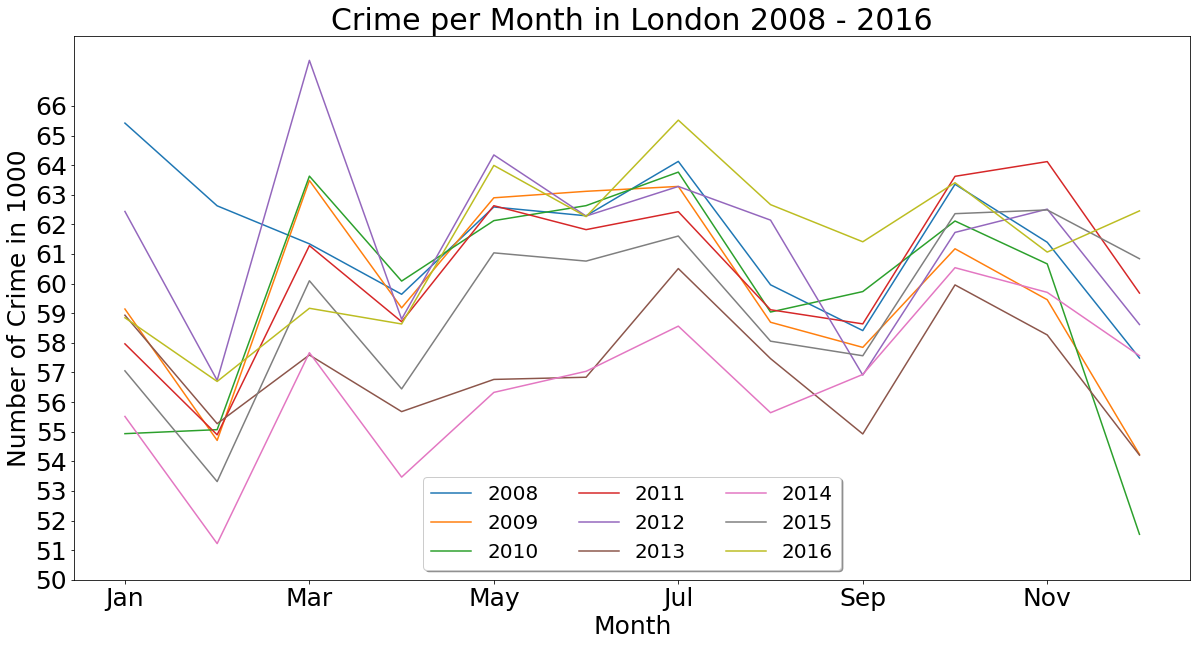

In [29]:
#data di plotkan
df_crime_per_month.plot(kind='line', stacked=False, figsize=(20,10))
plt.title('Crime per Month in London 2008 - 2016', size=30)
plt.xlabel('Month', size=25)
plt.ylabel('Number of Crime in 1000', size=25)
plt.xticks(size=25)
values1=np.arange(50, 67 , 1)
values_incerment1=1000
plt.yticks(values1*values_incerment1,['%d' %val for val in values1], size=25)
plt.legend(loc='lower center', ncol=3,fancybox=True, shadow=True, fontsize=20)
plt.show()

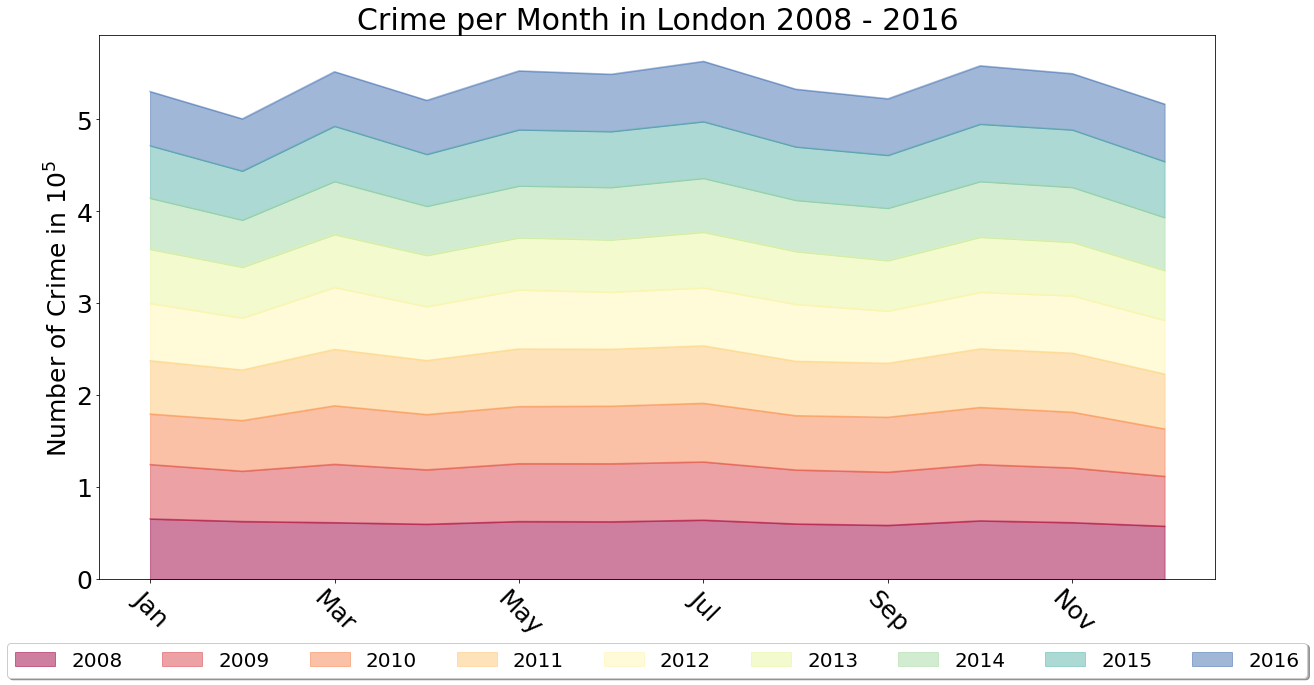

In [30]:
#memilih warna
colors2 = [cmap(i) for i in np.linspace(0, 4, 35)] #mendata warna yang akan digunakan
#data di plotkan
df_crime_per_month.plot(kind='area', stacked=True, figsize=(20,10), alpha=0.5,color=colors2)
plt.title('Crime per Month in London 2008 - 2016', size=30)
plt.xlabel('Month', size=25)
plt.ylabel('Number of Crime in $10^5$', size=25)
plt.xticks(rotation=-45, size=25)
values1=np.arange(0, 6 , 1)
values_incerment1=100000
plt.yticks(values1*values_incerment1,['%d' %val for val in values1], size=25)
plt.legend(loc='lower center', ncol=9,bbox_to_anchor=(0.5, -0.2),fancybox=True, shadow=True, fontsize=20)
plt.show()

# Crime per Borough

In [31]:
borough = df_london_crime['borough'].unique()
print(borough)

['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']


## Croydon

In [32]:
croydon=df_london_crime['borough']=='Croydon'
df_crime_croydon[croydon]

NameError: name 'df_crime_croydon' is not defined

In [ ]:
df_crime_major_category_croydon=pd.DataFrame(df_crime_croydon.groupby(['major_category']).size())
df_crime_major_category_croydon.rename(columns={0:"Croydon"}, inplace=True)
df_crime_major_category_croydon

## Greenwich

In [ ]:
greenwich=df_london_crime['borough']=='Greenwich'
df_crime_greenwich[greenwich]

In [ ]:
df_crime_major_category_greenwich=pd.DataFrame(df_crime_greenwich.groupby(['major_category']).size())
df_crime_major_category_greenwich.rename(columns={0:"Greenwich"}, inplace=True)
df_crime_major_category_greenwich